In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


### Convert to timeseries data

In [21]:
ts_data = df_data.set_index('Date').copy()

ts_data['Year'] = ts_data.index.year
ts_data['Month'] = ts_data.index.month
ts_data['Weekday Name'] = ts_data.index.weekday_name

target_var = ts_data["Price"]
ts_data.drop(columns="Price", inplace = True)
ts_data["Price"] = target_var

ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object
Price                 1500 non-null float64


### Seasonality Plot

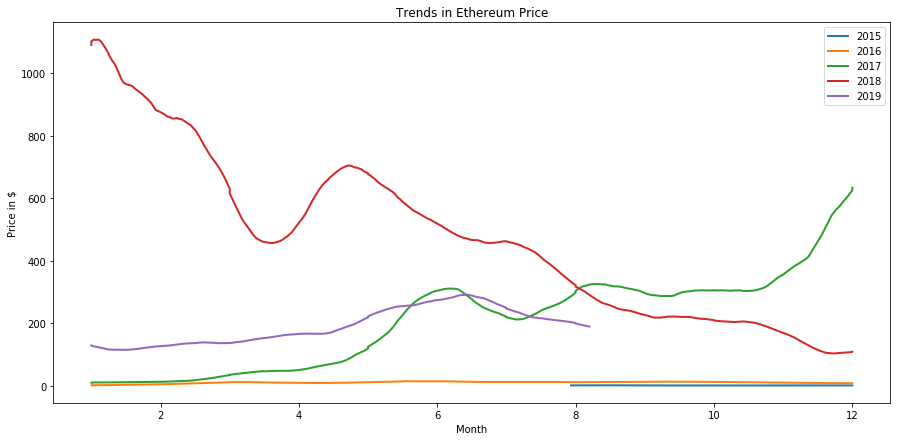

In [8]:
years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = ts_data[year][["Month","Price"]].rolling(30, center=True).mean()
    
fig, ax = plt.subplots(figsize=(15, 7))
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

In [13]:
def check_seasonality_boxplot(data, seasonality):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
    sns.boxplot(data=data, x=seasonality, y="Price", ax=ax)
    ax.set_ylabel('Price')
    ax.set_title(seasonality + " Seasonality")
    plt.show()

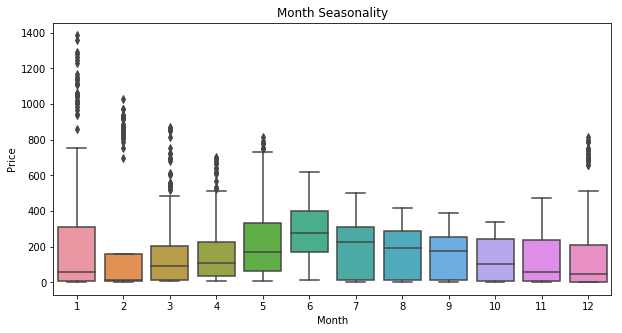

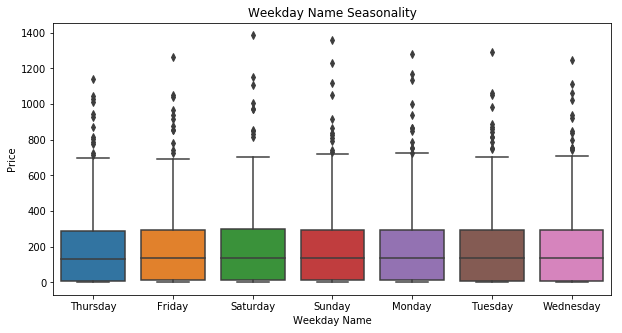

In [14]:
check_seasonality_boxplot(ts_data, "Month")
check_seasonality_boxplot(ts_data, "Weekday Name")

### Trend Plot

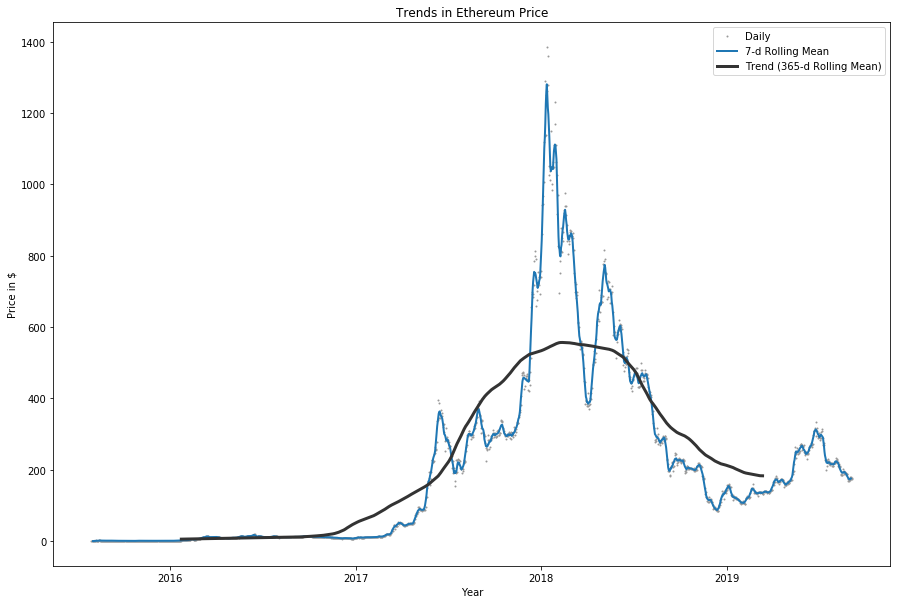

In [17]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price']

def plot_trend(column, data):
    ts_data_365d = data[[column]].rolling(window=365, center=True, min_periods=360).mean()
    ts_data_7d = data[[column]].rolling(7, center=True).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(data[column], marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(ts_data_7d[column], linewidth=2, label='7-d Rolling Mean')
    ax.plot(ts_data_365d[column], color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    # Set x-ticks to yearly interval and add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in $')
    ax.set_title('Trends in Ethereum Price');

plot_trend("Price",ts_data )

### Normalization

In [78]:
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features, min_max_scaler

def denormalise_var(x, scaler): 
    x_scaled = scaler.inverse_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features, scaler
    

In [89]:
test, scaler = normalise_var(df_data.iloc[:,1:])

### Data Stationarity

In [214]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput['p-value']

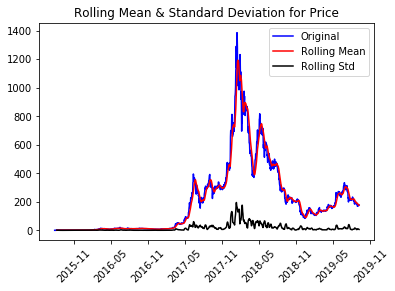

Results of Dickey-Fuller Test:
Test Statistic                   -2.074704
p-value                           0.254807
# Lags Used                      23.000000
Number of Observations Used    1476.000000
Critical Value (1%)              -3.434788
Critical Value (5%)              -2.863500
Critical Value (10%)             -2.567814
dtype: float64


0.25480727262756

In [215]:
test_stationarity(ts_data,"Price")

In [229]:
# Transformation
df_transformed = pd.DataFrame()
df_transformed['Price'] = ts_data['Price']
# Transformation - log ts
df_transformed['ts_log'] = df_transformed['Price'].apply(lambda x: np.log(x))
# Transformation - 7-day moving averages of log ts
df_transformed['ts_log_moving_avg'] = df_transformed['ts_log'].rolling(window = 7, center = False).mean()
# Transformation - 7-day moving average ts
df_transformed['ts_moving_avg'] =  df_transformed['Price'].rolling(window = 7, center = False).mean()
# Transformation - Difference between logged ts and first-order difference logged ts
df_transformed['ts_log_diff'] = df_transformed['ts_log'].diff()
# Transformation - Difference between ts and moving average ts
df_transformed['ts_moving_avg_diff'] = df_transformed['Price'] - df_transformed['ts_moving_avg']
# Transformation - Difference between logged ts and logged moving average ts
df_transformed['ts_log_moving_avg_diff'] = df_transformed['ts_log'] - df_transformed['ts_log_moving_avg']
# Transformation - Difference between logged ts and logged moving average ts
df_transformed = df_transformed.dropna()
# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df_transformed['ts_log_ewma'] = df_transformed['ts_log'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()
# Transformation - Difference between logged ts and logged EWMA ts
df_transformed['ts_log_ewma_diff'] = df_transformed['ts_log'] - df_transformed['ts_log_ewma']


/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [230]:
df_transformed.tail()

,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
Date,,,,,,,,,
2019-09-02,178.76,5.186044,5.160079,174.282857,0.041927,4.477143,0.025965,5.223950,-0.037906
2019-09-03,179.13,5.188112,5.153806,173.134286,0.002068,5.995714,0.034305,5.220571,-0.032459
2019-09-04,175.01,5.164843,5.155448,173.420000,-0.023269,1.590000,0.009395,5.215317,-0.050474
2019-09-05,174.38,5.161237,5.159968,174.195714,-0.003606,0.184286,0.001269,5.210219,-0.048982
2019-09-06,177.13,5.176884,5.167086,175.425714,0.015647,1.704286,0.009798,5.207076,-0.030192


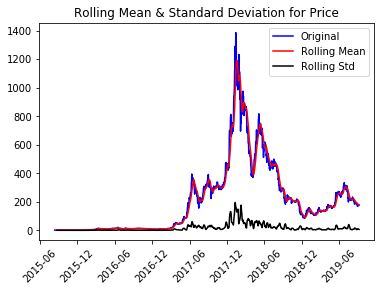

Results of Dickey-Fuller Test:
Test Statistic                   -2.073008
p-value                           0.255506
# Lags Used                      23.000000
Number of Observations Used    1462.000000
Critical Value (1%)              -3.434831
Critical Value (5%)              -2.863519
Critical Value (10%)             -2.567824
dtype: float64


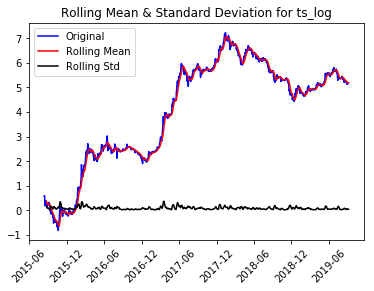

Results of Dickey-Fuller Test:
Test Statistic                   -1.751921
p-value                           0.404579
# Lags Used                       3.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64


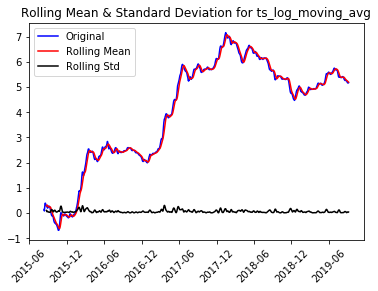

Results of Dickey-Fuller Test:
Test Statistic                   -1.739968
p-value                           0.410646
# Lags Used                      23.000000
Number of Observations Used    1462.000000
Critical Value (1%)              -3.434831
Critical Value (5%)              -2.863519
Critical Value (10%)             -2.567824
dtype: float64


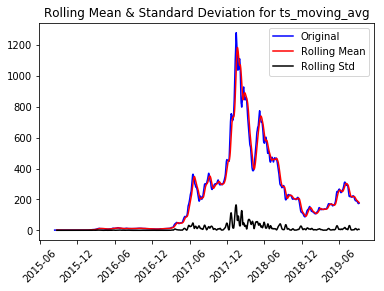

Results of Dickey-Fuller Test:
Test Statistic                   -2.137664
p-value                           0.229642
# Lags Used                      24.000000
Number of Observations Used    1461.000000
Critical Value (1%)              -3.434834
Critical Value (5%)              -2.863520
Critical Value (10%)             -2.567824
dtype: float64


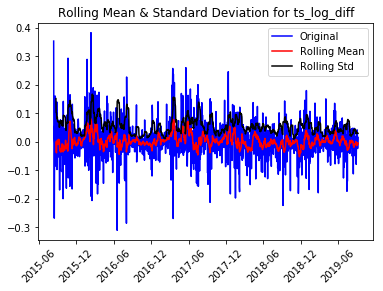

Results of Dickey-Fuller Test:
Test Statistic                  -20.742465
p-value                           0.000000
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


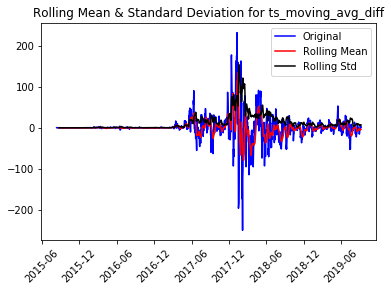

Results of Dickey-Fuller Test:
Test Statistic                -7.163487e+00
p-value                        2.926811e-10
# Lags Used                    2.000000e+01
Number of Observations Used    1.465000e+03
Critical Value (1%)           -3.434822e+00
Critical Value (5%)           -2.863515e+00
Critical Value (10%)          -2.567821e+00
dtype: float64


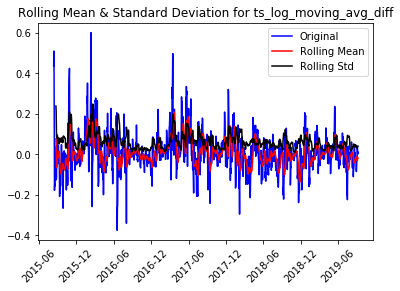

Results of Dickey-Fuller Test:
Test Statistic                -6.837409e+00
p-value                        1.827535e-09
# Lags Used                    1.400000e+01
Number of Observations Used    1.471000e+03
Critical Value (1%)           -3.434803e+00
Critical Value (5%)           -2.863507e+00
Critical Value (10%)          -2.567817e+00
dtype: float64


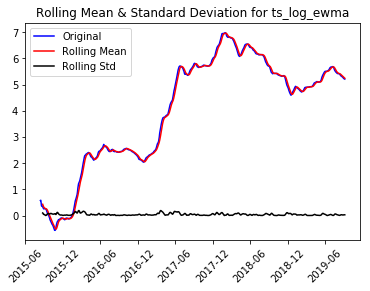

Results of Dickey-Fuller Test:
Test Statistic                   -1.546149
p-value                           0.510571
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


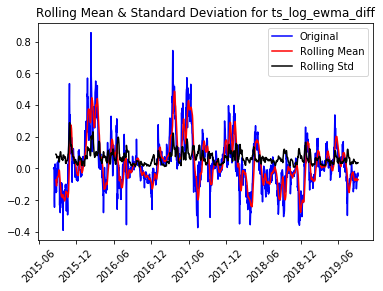

Results of Dickey-Fuller Test:
Test Statistic                -6.791175e+00
p-value                        2.362577e-09
# Lags Used                    1.000000e+00
Number of Observations Used    1.484000e+03
Critical Value (1%)           -3.434764e+00
Critical Value (5%)           -2.863490e+00
Critical Value (10%)          -2.567808e+00
dtype: float64


{'Price': 0.2555058851317827,
 'ts_log': 0.40457917334827515,
 'ts_log_moving_avg': 0.41064608814156106,
 'ts_moving_avg': 0.22964160811680623,
 'ts_log_diff': 0.0,
 'ts_moving_avg_diff': 2.926811254341193e-10,
 'ts_log_moving_avg_diff': 1.827534605751603e-09,
 'ts_log_ewma': 0.510571139340731,
 'ts_log_ewma_diff': 2.362576829101344e-09}

In [231]:
p_values = {}
# Perform stationarity test
for c in df_transformed.columns.values:
    p_values[c] = test_stationarity(df = df_tranformed, ts = c)

display(p_values)

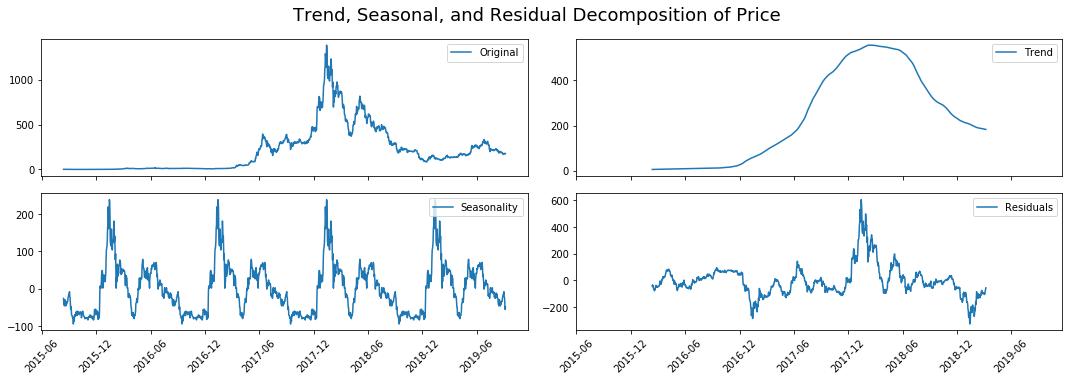

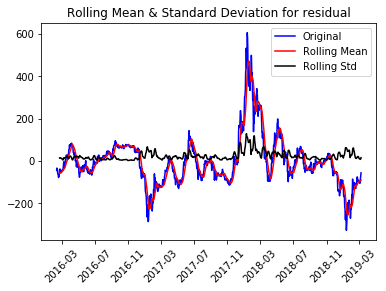

Results of Dickey-Fuller Test:
Test Statistic                   -4.013792
p-value                           0.001340
# Lags Used                      21.000000
Number of Observations Used    1100.000000
Critical Value (1%)              -3.436309
Critical Value (5%)              -2.864171
Critical Value (10%)             -2.568171
dtype: float64


0.001339987182048939

In [334]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_data(df):
    decomposition = seasonal_decompose(df['Price'], freq = 365)
    trend = decomposition.trend
    seasonality = decomposition.seasonal
    residual = decomposition.resid
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df["Price"], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(trend, label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(seasonality,label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(residual, label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    # Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition of Price', 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
    plt.show()
    
    return residual, trend, seasonality
    

residual, trend, seasonality = decompose_data(df_transformed)
df_transformed['residual'] = residual
df_transformed['seasonality'] = seasonality
df_transformed['trend'] = trend
test_stationarity(df_transformed.dropna(),'residual')


### Lag variables

In [272]:
def shift_var(data, prev, future, endog, exog):
    lag_var = pd.DataFrame()
    for i in range(prev+future,-1,-1):
        if i>future:
            time = "t-"+str(i-future)
            lag_var[time] = data[endog].shift(i).values
            
            for c in exog:
                lag_var[time + "_"+c] = data[c].shift(i).values
        
        elif i == future:
            time = "t"
            lag_var[time] = data[endog].shift(i).values
        else:
            time = "t+"+str(future-i)
            lag_var[time] = data[endog].shift(i).values
    lag_var[time] = data[endog].values
    lag_var = lag_var[prev+future:]
    return lag_var


normalise_Lag_features = shift_var(df_data,3, 3,"Price",[])
normalise_Lag_features.tail()

,t-3,t-2,t-1,t,t+1,t+2,t+3
1495,187.17,173.01,168.95,168.52,172.15,171.42,178.76
1496,173.01,168.95,168.52,172.15,171.42,178.76,179.13
1497,168.95,168.52,172.15,171.42,178.76,179.13,175.01
1498,168.52,172.15,171.42,178.76,179.13,175.01,174.38
1499,172.15,171.42,178.76,179.13,175.01,174.38,177.13


### Feature Importance

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

def plot_featimp(X,y):
    # fit random forest model
    model = RandomForestRegressor(n_estimators=500, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = X.columns.values
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names, rotation='vertical')
    plt.title("Feature Importance")
    plt.show()
    

def select_feature(X,y, numberOfFeatures):
    rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), numberOfFeatures)
    fit = rfe.fit(X, y)
    # report selected features
    print('Selected Features:')
    names = X.columns.values
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, fit.ranking_)
    plt.xticks(ticks, names, rotation="vertical")
    plt.show()

[0.    0.    0.    0.    0.    0.    0.014 0.008 0.01  0.012 0.022 0.016
 0.006 0.002 0.01  0.012 0.018 0.01  0.008 0.008 0.012 0.024 0.018 0.012
 0.022 0.014 0.012 0.01  0.008 0.012 0.016 0.006 0.012 0.01  0.008 0.008
 0.008 0.008 0.018 0.018 0.02  0.022 0.006 0.012 0.012 0.    0.008 0.028
 0.034 0.002 0.008 0.006 0.006 0.    0.02  0.01  0.008 0.03  0.012 0.008
 0.008 0.01  0.002]


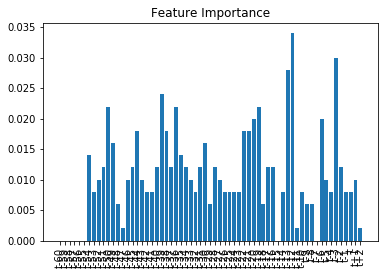

Selected Features:
t-52
t-45
t-38
t-36
t-22
t-21
t-20
t-17
t-16
t-12


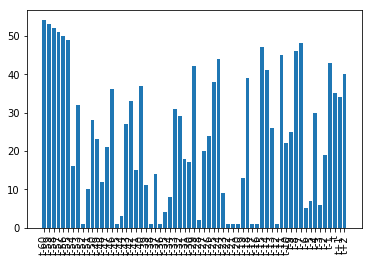

In [213]:
normalise_Lag_features.dropna(inplace = True)
X = normalise_Lag_features.iloc[:,0:-1]
y = normalise_Lag_features.iloc[:,-1]

# with supervised learning
plot_featimp(X,y)
select_feature(X,y,10)

# Model Fitting

## 1)ARIMA vs SARIMA


In [251]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

## put hyperparameter tuning here

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as 

,test,pred
0,221.18,225.820021
1,210.47,224.926591
2,206.26,222.851898
3,216.39,221.798993
4,211.28,217.731882


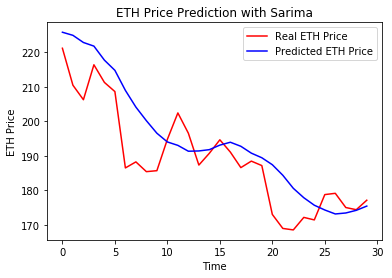

,test,pred
0,221.18,225.308205
1,210.47,224.053343
2,206.26,222.238978
3,216.39,221.198349
4,211.28,217.958125


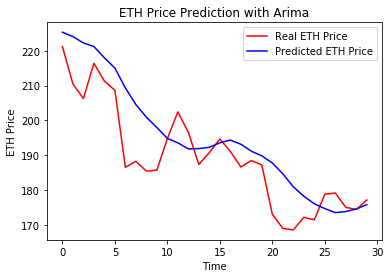

In [394]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

def forecast_sarima(data, steps, p, d, q, season):
    model = sm.tsa.statespace.SARIMAX(data[:-steps],order=(p,d,q), seasonal_order=(p, d, q, season),enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    pred_uc = results.get_forecast(steps=steps)
    return pred_uc.predicted_mean
def forecast_arima(data, steps, p, d, q):
    model = ARIMA(data, order=(p,d,q))
    model = model.fit()
    forecast = model.forecast(steps=steps)[0]
    return forecast
    
def detrasnform_residual(pred, detransvar): 
    return pred + detransvar

def plot_pred(test, pred, modelname):
    comparison = pd.DataFrame(columns=["test","pred"])
    comparison["test"] = test
    comparison["pred"] = pred
    display(comparison.head())
    plt.plot(comparison["test"], color = 'red', label = 'Real ETH Price')\
    plt.plot(comparison["pred"], color = 'blue', label = 'Predicted ETH Price')
    plt.title('ETH Price Prediction with '+modelname)
    plt.xlabel('Time')
    plt.ylabel('ETH Price')
    plt.legend()
    plt.show()
    

predSarima = forecast_sarima(df_transformed['ts_moving_avg_diff'], 30, 1, 0, 0, 12)
predSarima = detrasnform_residual(predSarima, df_transformed['ts_moving_avg'][-30:])

predArima = forecast_arima(df_transformed['ts_moving_avg_diff'], 30, 1, 0, 0)
predArima = detrasnform_residual(predArima, df_transformed['ts_moving_avg'][-30:])

plot_pred(df_transformed["Price"][-30:].values, predSarima.values, "Sarima")
plot_pred(df_transformed["Price"][-30:].values, predArima.values, "Arima")


,test,predArima,predSarima
0,221.18,225.308205,225.820021
1,210.47,224.053343,224.926591
2,206.26,222.238978,222.851898
3,216.39,221.198349,221.798993
4,211.28,217.958125,217.731882


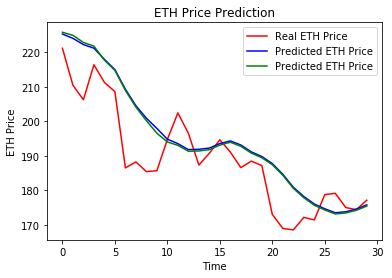

In [400]:
comparison = pd.DataFrame(columns=["test","predArima","predSarima"])
comparison["test"] = df_transformed["Price"][-30:].values
comparison["predArima"] = predArima.values
comparison["predSarima"] = predSarima.values
display(comparison.head())
plt.plot(comparison["test"], color = 'red', label = 'Real ETH Price')
plt.plot(comparison["predArima"], color = 'blue', label = 'Predicted ETH Price')
plt.plot(comparison["predSarima"], color = 'green', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction')
plt.xlabel('Time')
plt.ylabel('ETH Price')
plt.legend()
plt.show()

## 2) FB Prophet

In [406]:
from fbprophet import Prophet

df_prophet = pd.DataFrame(columns=["ds","y"])
df_prophet["ds"] =  ts_data.index.values
df_prophet["y"] = ts_data.Price.values
display(df_prophet)

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)
future_dates = model.make_future_dataframe(periods=30)

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast,uncertainty=True)

,ds,y
0,2015-07-30,0.00
1,2015-07-31,0.00
2,2015-08-01,0.00
3,2015-08-02,0.00
4,2015-08-03,0.00
5,2015-08-04,0.00
6,2015-08-05,0.00
7,2015-08-06,0.00
8,2015-08-07,2.77
9,2015-08-08,0.81


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# results.plot_diagnostics(figsize=(15, 12))
    #plt.show()
    
    #pred = results.get_prediction(start=pd.to_datetime(startDate), dynamic=False)
   # pred_ci = pred.conf_int()
    
   # ax = data.plot(label='observed')
   # pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

   # ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    #ax.set_xlabel('Date')
    #ax.set_ylabel('Price')
    #plt.legend()

    #plt.show()
    
    df_arima_forecasted = pred.predicted_mean.to_frame()
    df_arima_forecasted.columns=['PredPrice']
    df_arima_forecasted.index.names = ['Date']

    df_arima_truth = data[startDate:]